<h1>Job Market: Deep Dive Job Market</h1>

Looking into analyst role.

How does the average salary for Analysts role differs based on skill-set, work-type, and industry? 

We will look at the job title, skill, work type, industry, avg_salary data for Analyst position

In [1]:
#import library
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#load data
job = pd.read_csv('job_market_insight.csv', encoding='latin-1') #file was encoded using latin-1
print(f'Overall Job Market Data')
job.info()

Overall Job Market Data
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1796 entries, 0 to 1795
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Job Title      1796 non-null   object
 1   Job Info       1776 non-null   object
 2   Position       1792 non-null   object
 3   Employer       1795 non-null   object
 4   City           1795 non-null   object
 5   Province       1652 non-null   object
 6   Skill          1796 non-null   object
 7   Seniority      1779 non-null   object
 8   Work Type      1794 non-null   object
 9   Industry Type  1796 non-null   object
 10  Min_Salary     1786 non-null   object
 11  Max_Salary     1792 non-null   object
 12  Avg_Salary     1790 non-null   object
dtypes: object(13)
memory usage: 182.5+ KB


In [2]:
#drop data if the null value is more than 5
job.dropna(thresh=5, inplace=True)
job.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1796 entries, 0 to 1795
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Job Title      1796 non-null   object
 1   Job Info       1776 non-null   object
 2   Position       1792 non-null   object
 3   Employer       1795 non-null   object
 4   City           1795 non-null   object
 5   Province       1652 non-null   object
 6   Skill          1796 non-null   object
 7   Seniority      1779 non-null   object
 8   Work Type      1794 non-null   object
 9   Industry Type  1796 non-null   object
 10  Min_Salary     1786 non-null   object
 11  Max_Salary     1792 non-null   object
 12  Avg_Salary     1790 non-null   object
dtypes: object(13)
memory usage: 182.5+ KB


In [3]:
#drop duplicated
print(f'Number of duplicated rows: {job.duplicated().sum()}')

job.dropna(inplace=True)
job.info()

Number of duplicated rows: 129
<class 'pandas.core.frame.DataFrame'>
Index: 1597 entries, 2 to 1795
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Job Title      1597 non-null   object
 1   Job Info       1597 non-null   object
 2   Position       1597 non-null   object
 3   Employer       1597 non-null   object
 4   City           1597 non-null   object
 5   Province       1597 non-null   object
 6   Skill          1597 non-null   object
 7   Seniority      1597 non-null   object
 8   Work Type      1597 non-null   object
 9   Industry Type  1597 non-null   object
 10  Min_Salary     1597 non-null   object
 11  Max_Salary     1597 non-null   object
 12  Avg_Salary     1597 non-null   object
dtypes: object(13)
memory usage: 174.7+ KB


Text(0.5, 1.0, 'Job Title')

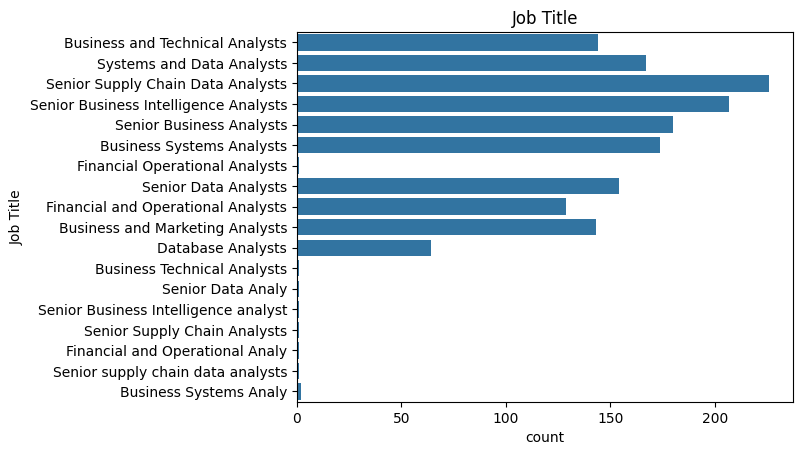

In [4]:
#data cleaning for Job Title to ensure we get all of the data

#even though there is no missing value, data quality check need to be performed for Job Title
sns.countplot(data=job, y='Job Title', stat='count' )
plt.title('Job Title')


In [5]:
#from the plot we can see there are some misstyped and different styling of capitalization
#therefore data needs to be fixed

# Get the value counts for 'Job Title'
title_counts = job['Job Title'].value_counts()

# Filter titles that has some missed types
titles_typos = title_counts[title_counts < 5].index
titles_typos

Index(['Business Systems Analy', 'Financial Operational Analysts',
       'Business Technical Analysts', 'Senior Data Analy',
       'Senior Business Intelligence analyst', 'Senior Supply Chain Analysts',
       'Financial and Operational Analy', 'Senior supply chain data analysts'],
      dtype='object', name='Job Title')

Text(0.5, 1.0, 'Job Title')

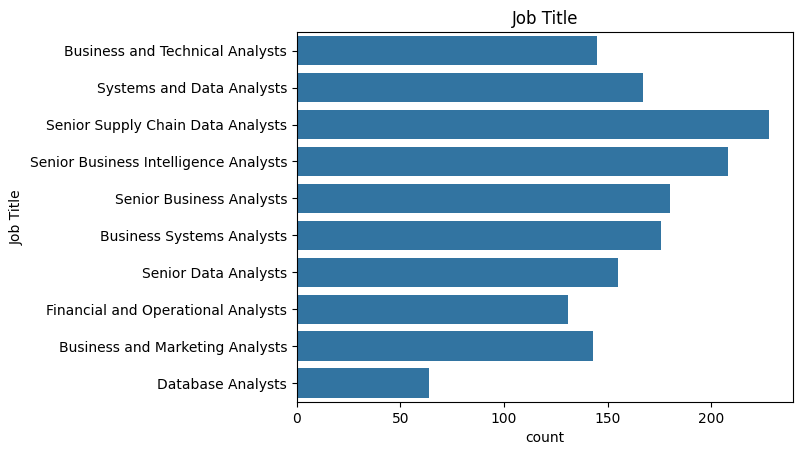

In [6]:
#fixing the typos in a form of dictionary
fixed_typos = ['Senior Supply Chain Data Analysts', 'Business Systems Analysts',
       'Financial and Operational Analysts', 'Business Systems Analysts',
       'Business and Technical Analysts', 'Senior Data Analysts',
       'Senior Business Intelligence Analysts',
       'Financial and Operational Analysts', 'Senior Supply Chain Data Analysts']
fixed_titles = dict(zip(titles_typos, fixed_typos))

#fixing the typos by replacing values based on key and index
job['Job Title'] = job['Job Title'].replace(fixed_titles)

#re-plot the data
sns.countplot(data=job, y='Job Title', stat='count')
plt.title('Job Title')

In [7]:
#after we clean the job title column, we will slice the data only for the 'Senior Business Intelligence Analyst'
bi_job = job[job['Position']=='Analyst']

#print information regarding the sliced data
bi_job.info()

<class 'pandas.core.frame.DataFrame'>
Index: 689 entries, 5 to 1795
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Job Title      689 non-null    object
 1   Job Info       689 non-null    object
 2   Position       689 non-null    object
 3   Employer       689 non-null    object
 4   City           689 non-null    object
 5   Province       689 non-null    object
 6   Skill          689 non-null    object
 7   Seniority      689 non-null    object
 8   Work Type      689 non-null    object
 9   Industry Type  689 non-null    object
 10  Min_Salary     689 non-null    object
 11  Max_Salary     689 non-null    object
 12  Avg_Salary     689 non-null    object
dtypes: object(13)
memory usage: 75.4+ KB


In [8]:
#for skill column, there is no missing data however data pre-processing must be done to standardize data

#steps skill data cleaning:
#capitalize all skils
#replace white trailing
#split based on comma
#set to remove duplicate
job['skill_clean'] = job.apply(lambda row: set(list(row.Skill.upper().replace(', ',',').split(','))), axis = 1)

#count how many unique skills
job['count_skill'] = job.apply(lambda row: len(row.skill_clean), axis=1)

In [9]:
#remove all currcency codes
job['Min_Salary']=job['Min_Salary'].str.replace('$','')
job['Max_Salary']=job['Max_Salary'].str.replace('$','')
job['Avg_Salary']=job['Avg_Salary'].str.replace('$','')

#handling missing value for the minimum salary
print(f'Min Salary Missing Value: {len(job[job['Min_Salary'].isna()])}')
print(f'Max Salary Missing Value: {len(job[job['Max_Salary'].isna()])}')
print(f'Avg Salary Missing Value: {len(job[job['Avg_Salary'].isna()])}')

"""
filling missing value by looking up other data:
1. find median salary with the same job title, seniority, and same company
2. find the mean of minimum salary with the same job title and seniority
"""

def fill_salary(row_missing, salary_type):
    jobn = job[job[salary_type].notna()]

    
    
    same_title = jobn[jobn['Job Title']==row_missing['Job Title']]
    same_seniority = same_title[same_title['Seniority']==row_missing['Seniority']]
    same_company = same_seniority[same_seniority['Employer']==row_missing['Employer']]
    if len(same_company) >0:
        return pd.to_numeric(same_company[salary_type]).median()
    elif len(same_seniority)>0:
        return pd.to_numeric(same_seniority[salary_type]).median()
    else:
        return pd.to_numeric(same_title[salary_type]).median()

    

#handling minimum salary missing value
for index, row in job[job['Min_Salary'].isna()].iterrows():
    job.loc[index,'Min_Salary'] = fill_salary(row,'Min_Salary')

#handling maximum salary missing value
for index, row in job[job['Max_Salary'].isna()].iterrows():
    job.loc[index,'Max_Salary'] = fill_salary(row,'Max_Salary')

#handling averaga salary missing value
for index, row in job[job['Avg_Salary'].isna()].iterrows():
    job.loc[index,'Avg_Salary'] = fill_salary(row,'Avg_Salary')

print(f'Min Salary Missing Value After handling: {len(job[job['Min_Salary'].isna()])}')
print(f'Max Salary Missing Value After handling: {len(job[job['Max_Salary'].isna()])}')
print(f'Avg Salary Missing Value After handling: {len(job[job['Avg_Salary'].isna()])}')

Min Salary Missing Value: 0
Max Salary Missing Value: 0
Avg Salary Missing Value: 0
Min Salary Missing Value After handling: 0
Max Salary Missing Value After handling: 0
Avg Salary Missing Value After handling: 0


In [10]:
bi_job.loc[:,'skill_clean'] = job.apply(lambda row: set(list(row.Skill.upper().replace(', ',',').split(','))), axis = 1)
bi_job.loc[:,'count_skill'] = job.apply(lambda row: len(row.skill_clean), axis=1)

/var/folders/9f/klpz4yzx3hq9bcs22_drg0740000gn/T/ipykernel_42788/42829362.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bi_job.loc[:,'skill_clean'] = job.apply(lambda row: set(list(row.Skill.upper().replace(', ',',').split(','))), axis = 1)
/var/folders/9f/klpz4yzx3hq9bcs22_drg0740000gn/T/ipykernel_42788/42829362.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bi_job.loc[:,'count_skill'] = job.apply(lambda row: len(row.skill_clean), axis=1)


Text(0, 0.5, 'Skill')

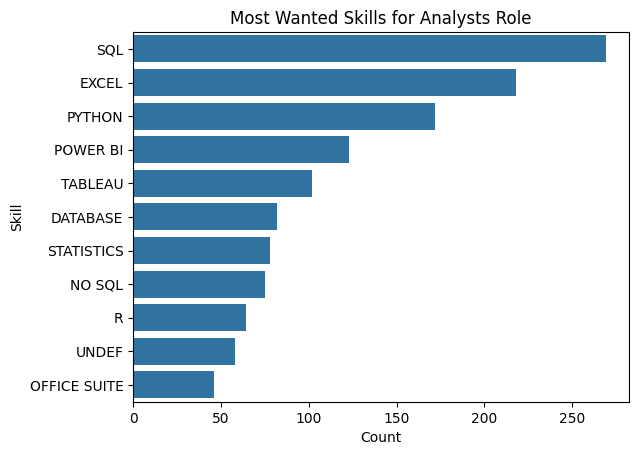

In [11]:
#to get information more on what skills needed to become a senior business intelligence analyst, we will count the occurances of skills

#split and flatten the 'skill_clean' column into individual skills
all_skills = bi_job['skill_clean'].explode()

#count the occurrences of each skill
skill_counts = all_skills.value_counts()

#display the most mentioned skills
sns.barplot(y=skill_counts.index[:11], x=skill_counts.values[:11])
plt.title('Most Wanted Skills for Analysts Role')
plt.xlabel('Count')
plt.ylabel('Skill')

In [12]:
#checking work type
bi_job['Work Type'].value_counts()
#no need to clean the data

Work Type
In-Person    657
Remote        25
Hybrid         7
Name: count, dtype: int64

In [13]:
#checking the industry type, no problem within the data
bi_job['Industry Type'].value_counts()

Industry Type
Others                357
Technology            123
Healthcare             54
Finance                36
Service                29
Energy                 12
Automotive             11
Consulting             11
Government              9
Education               8
Construction            8
Real Estate             7
Telecommunications      5
Insurance               3
Manufacturing           3
Transportation          3
Media                   3
Agriculture             2
Legal                   2
Aerospace               1
Other                   1
Travel                  1
Name: count, dtype: int64

In [14]:
#clean average salary, found string currency and need to remove and change into numeric
bi_job.loc[:,'Avg_Salary']=pd.to_numeric(bi_job['Avg_Salary'].str.replace('$',''))
bi_job.loc[:,'Min_Salary']=pd.to_numeric(bi_job['Min_Salary'].str.replace('$',''))
bi_job.loc[:,'Max_Salary']=pd.to_numeric(bi_job['Max_Salary'].str.replace('$',''))

Text(0.5, 1.0, 'Average Salary Business Intelligence Analsyt')

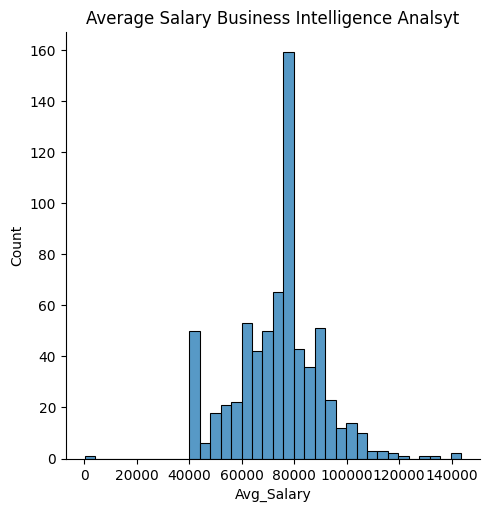

In [15]:
sns.displot(data=bi_job, x='Avg_Salary')
plt.title('Average Salary Business Intelligence Analsyt')

In [16]:
bi_job['Avg_Salary'].describe()

count       689.0
unique      185.0
top       77750.0
freq         54.0
Name: Avg_Salary, dtype: float64

In [17]:
#looking into details for the avg_salary minimum value since outlier is detected
bi_job.sort_values(['Avg_Salary']).head(1)

,Job Title,Job Info,Position,Employer,City,Province,Skill,Seniority,Work Type,Industry Type,Min_Salary,Max_Salary,Avg_Salary,skill_clean,count_skill
1217,Senior Business Intelligence Analysts,Sales Support Analyst,Analyst,Piller's Fine Foods,Waterloo,ON,"Python, No SQL, Power BI, SQL, Microsoft Outlook",ANY,In-Person,Others,56000.0,69000.0,62.5,"{MICROSOFT OUTLOOK, POWER BI, SQL, PYTHON, NO ...",5


Text(0.5, 1.0, 'Average Salary Analsyt Position')

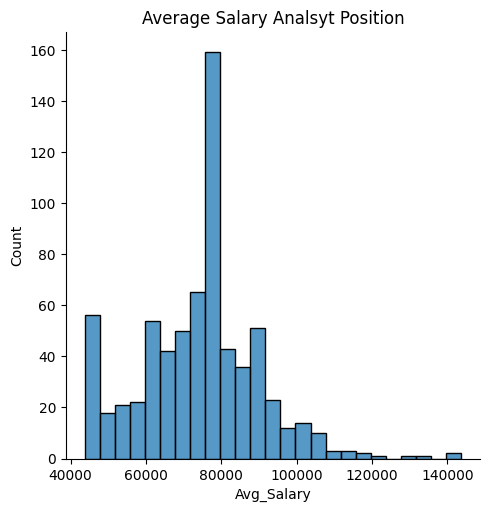

In [18]:
#most likely there was mistyped, we will correct the data to 62500 since it is below the max salary
bi_job.loc[1217, 'Avg_Salary'] = 62500

#replot the data 
sns.displot(data=bi_job, x='Avg_Salary')
plt.title('Average Salary Analsyt Position')

<h1>Data Analysis</h1>


Text(0.5, 1.0, 'Range of Salary vs Count Skills Mentioned')

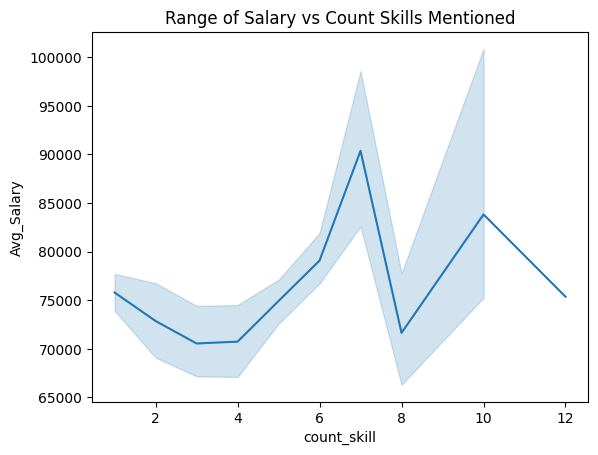

In [19]:
#is there any correlation between the number of skilss mentioned and the average salary
#mean of the group is increasing as the number of skills increasing, and stop when skills >7

sns.lineplot(data = bi_job, x='count_skill', y='Avg_Salary')

plt.title('Range of Salary vs Count Skills Mentioned')

In [20]:
bi_job.head()

,Job Title,Job Info,Position,Employer,City,Province,Skill,Seniority,Work Type,Industry Type,Min_Salary,Max_Salary,Avg_Salary,skill_clean,count_skill
5,Senior Supply Chain Data Analysts,Continuous Improvement Analyst,Analyst,IMP Group,Abbotsford,BC,Excel,ANY,In-Person,Others,68500.0,87000.0,77750.0,{EXCEL},1
6,Senior Business Intelligence Analysts,IT Business Process Analyst,Analyst,Ground Effects,Windsor,ON,"C#, Javascript, Sql, Database",ANY,In-Person,Others,68000.0,88300.0,78150.0,"{DATABASE, C#, JAVASCRIPT, SQL}",4
13,Senior Business Intelligence Analysts,Capital & Maintenance Program Analyst,Analyst,Toronto Hydro,Toronto,ON,"Gap, Vba, Excel, Sql",ANY,In-Person,Others,68000.0,88300.0,78150.0,"{SQL, EXCEL, GAP, VBA}",4
15,Senior Business Analysts,Senior Policy Analyst,Analyst,Insurance Council of BC,Vancouver,BC,Undef,Senior,In-Person,Insurance,89606.0,128809.0,109207.5,{UNDEF},1
16,Senior Business Intelligence Analysts,Business Operations Analyst (1 year Contract),Analyst,TMX Group Limited,Toronto,ON,Database,ANY,In-Person,Technology,68000.0,88300.0,78150.0,{DATABASE},1


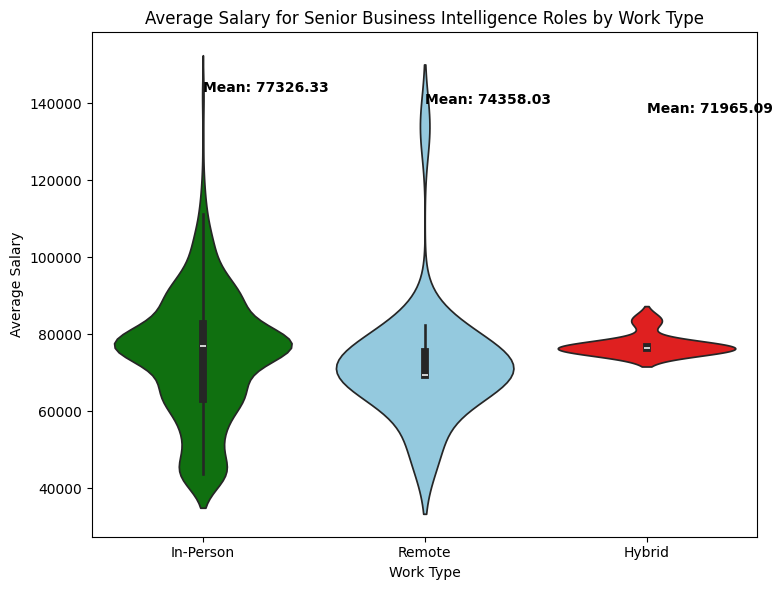

In [21]:
#is there any diffference of average salary based on work type for senior business intelligence
palette = {'Remote': 'skyblue', 'In-Person': 'green', 'Hybrid':'red'}

# Create the box plot
plt.figure(figsize=(8, 6))
box_plot = sns.violinplot(x='Work Type', y='Avg_Salary', data=bi_job, hue='Work Type', palette=palette)

# Calculate means for remote and in-person work types
mean_salaries = bi_job.groupby('Work Type')['Avg_Salary'].mean()

# Get the y-axis limits to determine where to place the annotations
y_min, y_max = box_plot.get_ylim()

# Annotate the means on the box plot
for i, mean in enumerate(mean_salaries):
    # Use a fixed offset or percentage of the y-axis range for positioning
    offset = (y_max - y_min) * 0.5  
    box_plot.text(i, mean + offset, f'Mean: {mean:.2f}', 
                  horizontalalignment='left', 
                  size='medium', color='black', weight='semibold')

plt.title('Average Salary for Senior Business Intelligence Roles by Work Type')
plt.xlabel('Work Type')
plt.ylabel('Average Salary')
plt.tight_layout()
plt.show()



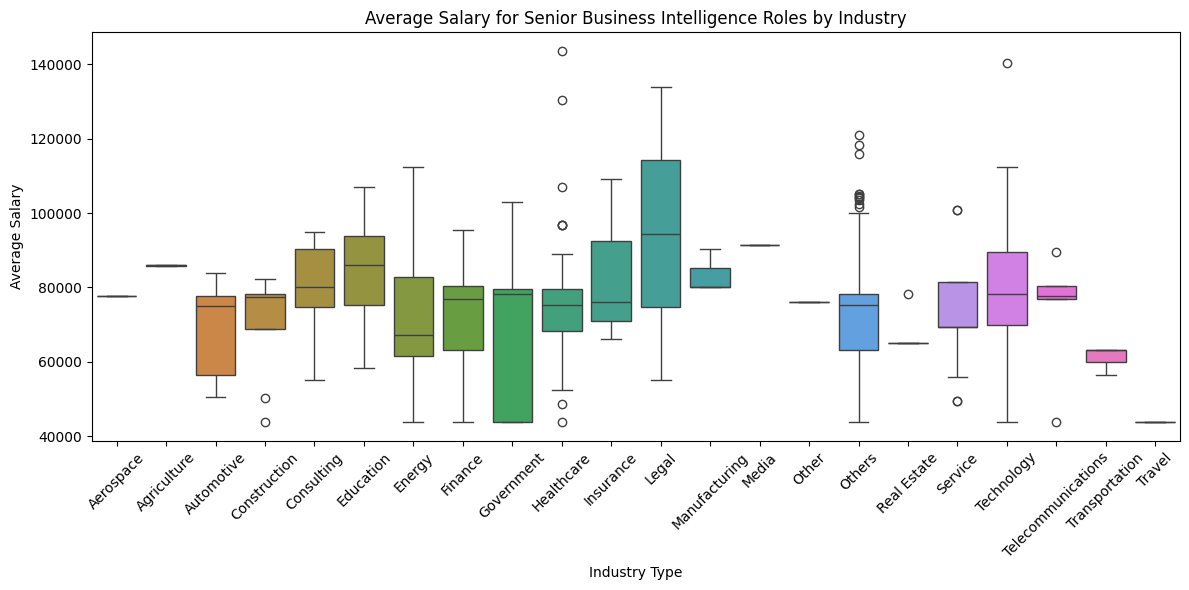

In [22]:
#does the salary differs between the industry, we will take a look at 10 different industry


#create the box plot
plt.figure(figsize=(12, 6))
box_plot = sns.boxplot(x='Industry Type', y='Avg_Salary', data=bi_job.sort_values('Industry Type'), hue='Industry Type')

#calculate means for remote and in-person work types
mean_salaries = bi_job.groupby('Industry Type')['Avg_Salary'].mean()




plt.title('Average Salary for Senior Business Intelligence Roles by Industry')
plt.xlabel('Industry Type')
plt.ylabel('Average Salary')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



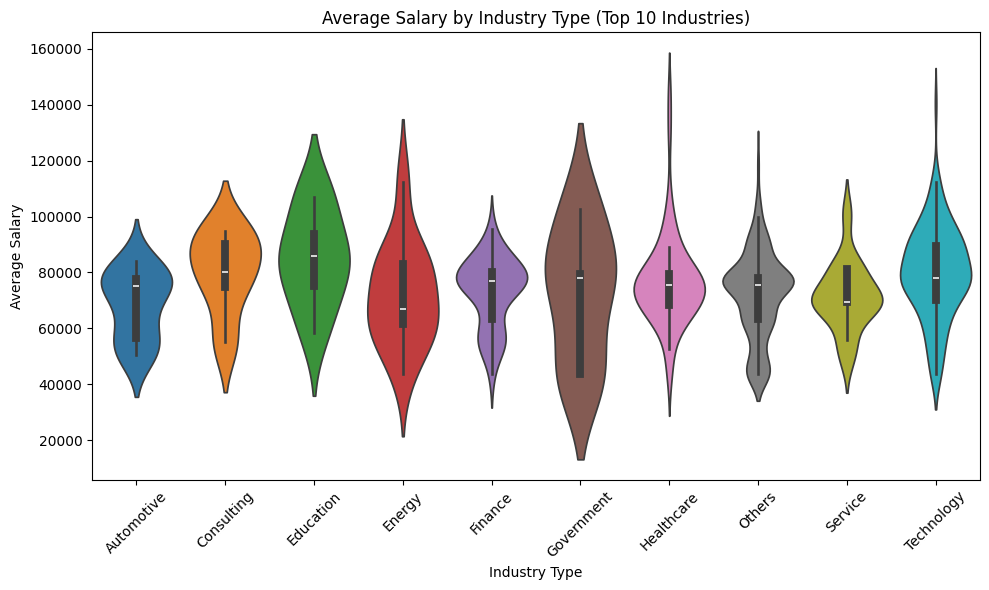

In [23]:
#does the salary differs between the industry, we will take a look at 10 different industry

top_10_industries = bi_job['Industry Type'].value_counts().nlargest(10).index

filtered_data = bi_job[bi_job['Industry Type'].isin(top_10_industries)]


filtered_data_sorted = filtered_data.sort_values('Industry Type')

# Step 4: Create the violin plot
plt.figure(figsize=(10, 6))
sns.violinplot(x='Industry Type', y='Avg_Salary', data=filtered_data_sorted, hue='Industry Type')

# Optional: Customize the plot
plt.title('Average Salary by Industry Type (Top 10 Industries)')
plt.xlabel('Industry Type')
plt.ylabel('Average Salary')
plt.xticks(rotation=45)  # Rotate the x labels for better readability
plt.tight_layout()
plt.show()

In [24]:
bi_job['Industry Type'].value_counts()

Industry Type
Others                357
Technology            123
Healthcare             54
Finance                36
Service                29
Energy                 12
Automotive             11
Consulting             11
Government              9
Education               8
Construction            8
Real Estate             7
Telecommunications      5
Insurance               3
Manufacturing           3
Transportation          3
Media                   3
Agriculture             2
Legal                   2
Aerospace               1
Other                   1
Travel                  1
Name: count, dtype: int64

In [25]:
len(bi_job)

689

In [26]:
bi_job.head()

,Job Title,Job Info,Position,Employer,City,Province,Skill,Seniority,Work Type,Industry Type,Min_Salary,Max_Salary,Avg_Salary,skill_clean,count_skill
5,Senior Supply Chain Data Analysts,Continuous Improvement Analyst,Analyst,IMP Group,Abbotsford,BC,Excel,ANY,In-Person,Others,68500.0,87000.0,77750.0,{EXCEL},1
6,Senior Business Intelligence Analysts,IT Business Process Analyst,Analyst,Ground Effects,Windsor,ON,"C#, Javascript, Sql, Database",ANY,In-Person,Others,68000.0,88300.0,78150.0,"{DATABASE, C#, JAVASCRIPT, SQL}",4
13,Senior Business Intelligence Analysts,Capital & Maintenance Program Analyst,Analyst,Toronto Hydro,Toronto,ON,"Gap, Vba, Excel, Sql",ANY,In-Person,Others,68000.0,88300.0,78150.0,"{SQL, EXCEL, GAP, VBA}",4
15,Senior Business Analysts,Senior Policy Analyst,Analyst,Insurance Council of BC,Vancouver,BC,Undef,Senior,In-Person,Insurance,89606.0,128809.0,109207.5,{UNDEF},1
16,Senior Business Intelligence Analysts,Business Operations Analyst (1 year Contract),Analyst,TMX Group Limited,Toronto,ON,Database,ANY,In-Person,Technology,68000.0,88300.0,78150.0,{DATABASE},1
